<a href="https://colab.research.google.com/github/molybdenum-jo/Recommend-Algorithm/blob/main/KOSPO__EDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리 로드 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 파일 불러오기 

In [ ]:
import zipfile

with zipfile.ZipFile('./KOSPOXDACON.zip', 'r') as zip_ref:
    zip_ref.extractall('./data')

In [ ]:
train = pd.read_csv('./data/train.csv')
train.head(2)

,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,TRAIN_000000,USER_00000,BOOK_044368,8,23.0,"sackville, new brunswick, canada",Road Taken,Rona Jaffe,2001.0,Mira
1,TRAIN_000001,USER_00000,BOOK_081205,8,23.0,"sackville, new brunswick, canada",Macbeth (New Penguin Shakespeare),William Shakespeare,1981.0,Penguin Books


In [ ]:
test = pd.read_csv('./data/test.csv')
test.head(2)

,ID,User-ID,Book-ID,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,TEST_000000,USER_00008,BOOK_047966,37.0,"vermilion, ohio, usa",Birds of Prey: A Novel of Suspense,J.A. Jance,2002.0,Avon
1,TEST_000001,USER_00008,BOOK_119494,37.0,"vermilion, ohio, usa",Midnight Voices,JOHN SAUL,2003.0,Ballantine Books


In [ ]:
train.shape

(871393, 10)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871393 entries, 0 to 871392
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   871393 non-null  object 
 1   User-ID              871393 non-null  object 
 2   Book-ID              871393 non-null  object 
 3   Book-Rating          871393 non-null  int64  
 4   Age                  871393 non-null  float64
 5   Location             871393 non-null  object 
 6   Book-Title           871393 non-null  object 
 7   Book-Author          871393 non-null  object 
 8   Year-Of-Publication  871393 non-null  float64
 9   Publisher            871393 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 66.5+ MB


In [ ]:
train.isnull().sum()

ID                     0
User-ID                0
Book-ID                0
Book-Rating            0
Age                    0
Location               0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [ ]:
train['ID'].nunique()

871393

# 전처리 및 EDA

## 컬럼 별 내용요약

ID : 샘플 고유 ID

User-ID : 유저 고유 ID

Book-ID : 도서 고유 ID

Book-Rating : 유저가 도서에 부여한 평점 (0점 ~ 10점), 
단, 0점인 경우에는 유저가 해당 도서에 관심이 없고 관련이 없는 경우

Age : 유저의 나이 . 

Location : 유저가 사는 지역 

 Book-Title : 도서명

 Book-Author : 저자 

 Year of publication :  도서 출판 년도 (-1일 경우 결측 혹은 알 수 없음)

 Publisher : 출판사 



# 전체 데이터 확인 

In [ ]:
# from pandas_profiling import ProfileReport

# train.profile_report()

array([[<AxesSubplot:title={'center':'Book-Rating'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Year-Of-Publication'}>,
        <AxesSubplot:>]], dtype=object)

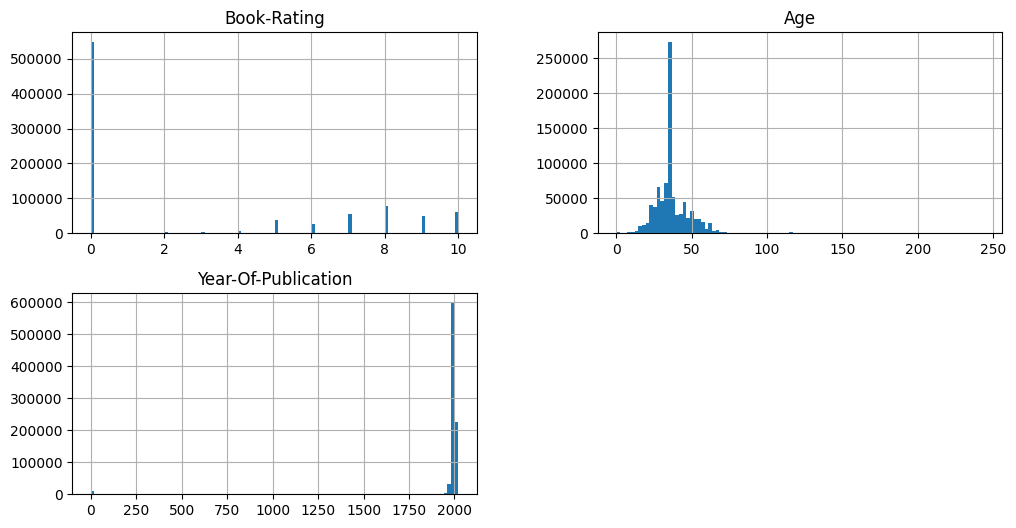

In [ ]:
train.hist(bins = 100, figsize = (12,6))

컬럼간의 뚜렷한 상관관계가 없음

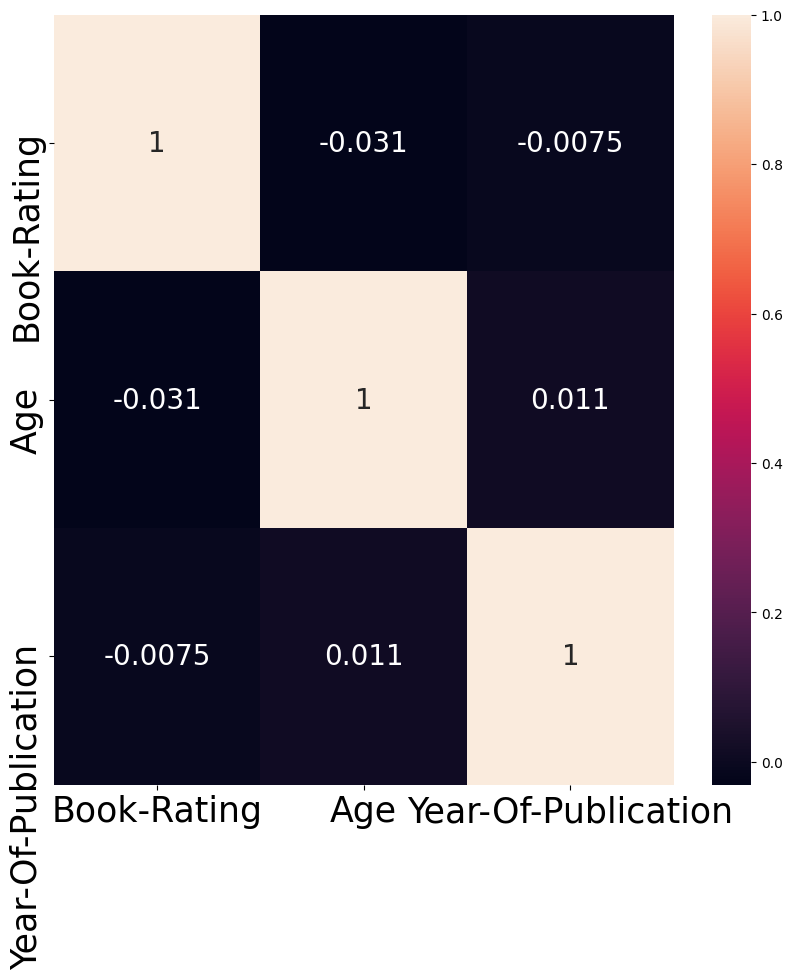

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), annot=True, annot_kws={'size': 20}) #annot 크기 조정
plt.tick_params(labelsize=25)

In [ ]:
train['Age'] = train['Age'].astype(int)
train['Year-Of-Publication'] = train['Year-Of-Publication'].astype(int)

'Age', 'Year-Of-Publication', 'BookRating'을 박스플롯으로 시각화하여 이상치확인  
    - Age데이터에 불가능한 값이 있음을 확인  
    - Year-Of-Publication에도 오류로 보이는 값이 들어있음을 확인  
    

<AxesSubplot:xlabel='Age'>

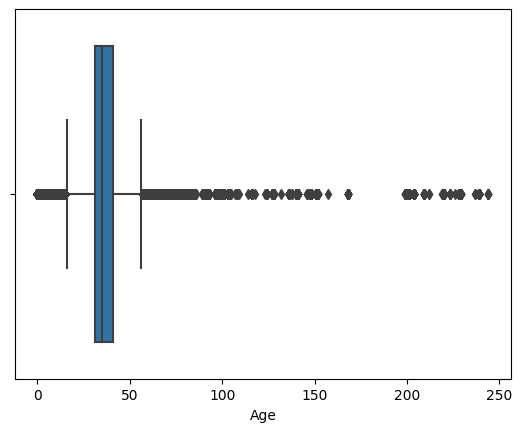

In [ ]:
sns.boxplot(x='Age', data=train)

<AxesSubplot:xlabel='Year-Of-Publication'>

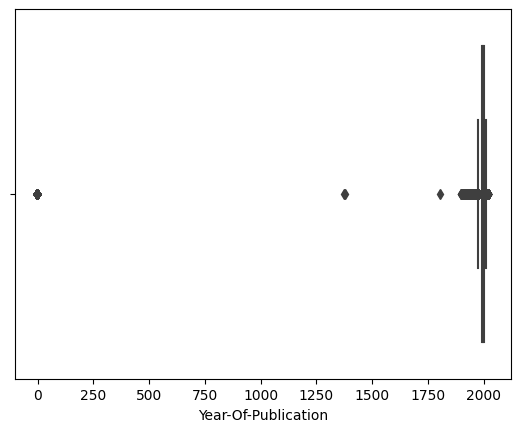

In [ ]:
sns.boxplot(x='Year-Of-Publication', data=train)

<AxesSubplot:xlabel='Book-Rating'>

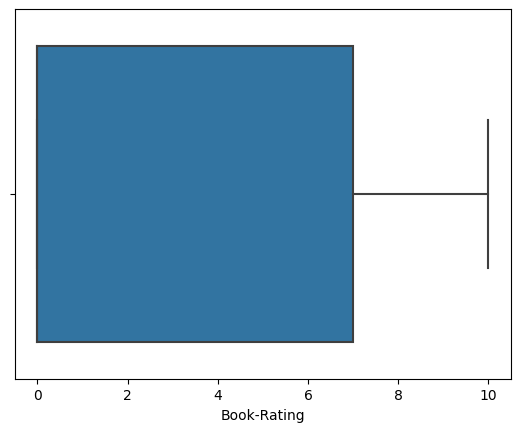

In [ ]:
sns.boxplot(x='Book-Rating', data=train)

# USER-ID 컬럼

In [ ]:
train['User-ID'].value_counts()

USER_56601    11143
USER_54845     6456
USER_52453     5814
USER_73501     4290
USER_03411     3453
              ...  
USER_39404        1
USER_39405        1
USER_39406        1
USER_39408        1
USER_92100        1
Name: User-ID, Length: 83256, dtype: int64

전체 데이터중 고유 ID값의 갯수 시각화 

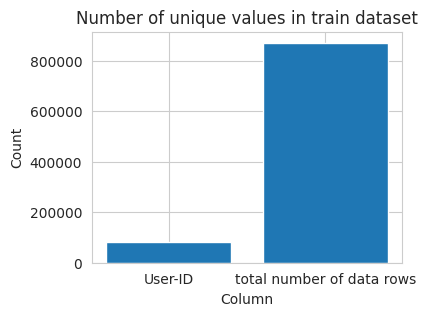

In [ ]:
# "User-ID" 컬럼과 "ID" 컬럼의 갯수 구하기
user_count = len(train['User-ID'].unique())
id_count = len(train['ID'].unique())

# 데이터프레임 만들기
count_df = pd.DataFrame({'column': ['User-ID', 'total number of data rows'], 'count': [user_count, id_count]})

# 그래프 그리기
plt.figure(figsize=(4,3))
plt.bar(count_df['column'], count_df['count'])
plt.title('Number of unique values in train dataset')
plt.xlabel('Column')
plt.ylabel('Count')
plt.show()

평균적으로 USER-ID 별 책 10권에 대한 리뷰 남김 

In [ ]:
train['User-ID'].value_counts().mean()

10.466428845969059

# AGE 컬럼 

데이터셋의 가장 작은 나이가 0, 가장 많은 나이가 244세로 잘못된 데이터입력이 있다는 것을 확인

In [ ]:
max_age = train['Age'].max() # Age 열의 최대값 찾기
min_age = train['Age'].min() # Age 열의 최소값 찾기

print('Maximum Age:', max_age)
print('Minimum Age:', min_age)

Maximum Age: 244
Minimum Age: 0


0세부터 244까지의 분포를 더 자세하게 확인함

In [ ]:
sorted_age = sorted(train['Age'].unique())
age_list = list(sorted_age)
print(age_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 89, 90, 92, 93, 96, 97, 98, 99, 100, 101, 103, 104, 105, 107, 108, 109, 114, 116, 118, 123, 124, 127, 128, 132, 136, 138, 140, 141, 146, 147, 148, 151, 152, 157, 168, 199, 200, 201, 204, 209, 212, 219, 220, 223, 226, 228, 229, 237, 239, 244]


Age 분포 plotly를 통한 시각화

In [ ]:
import plotly.graph_objs as go

# Create the data for the bar chart
data = [go.Bar(
            x=train['Age'].value_counts().index,
            y=train['Age'].value_counts().values,
            hovertext=['Age: ' + str(age) + '<br>Count: ' + str(count) for age, count in zip(train['Age'].value_counts().index, train['Age'].value_counts().values)],
            hoverinfo='text'
    )]

# Set the layout of the figure
layout = go.Layout(title='Age distribution',
                   xaxis=dict(title='Age'),
                   yaxis=dict(title='Count'))

# Create the figure object
fig = go.Figure(data=data, layout=layout)

# Show the figure
fig.show()

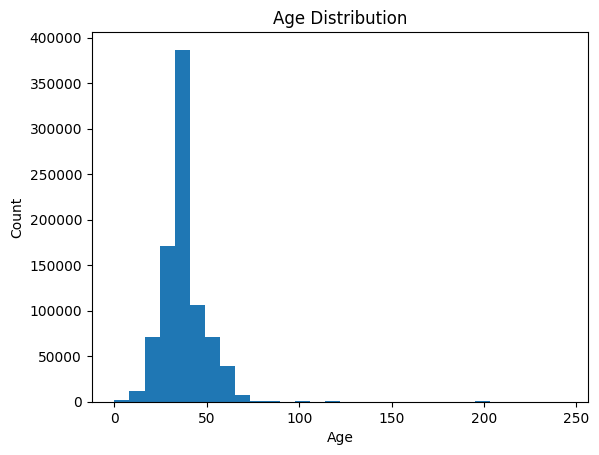

In [ ]:
train['Age'].plot.hist(bins=30) # 히스토그램 그리기
plt.title('Age Distribution') # 그래프 제목 설정
plt.xlabel('Age') # x축 레이블 설정
plt.ylabel('Count') # y축 레이블 설정
plt.show() # 그래프 보이기

35세의 유저들이 가장 많았고, 유저들의 평균나이는 약 36.7세 이다. 

In [ ]:
pd.DataFrame(train["Age"].value_counts())

,Age
35,251455
33,27349
29,25456
30,23085
31,22515
...,...
118,1
109,1
147,1
123,1


In [ ]:
train["Age"].mean()

36.79986068283771

# AGE 컬럼 전처리

전처리 논의   
* 의견1) 0세는 상위1% 값이 15세로 대체. 모두 하위 4%와 3% 구간 사이에서 비교적 급격한 나이 변화가 일어났으므로 급격한 나이변화가 일어나는 구간부터는 모두 이상치로 판단, 따라서 하위4% 이하인 80세 이상은 모두 80세로 대체  
* 의견2) 상위 1%인 0-15세를 모두 15세로 대체하며, 하위1%에 해당하는 67세-244세는 모두 67세로 대체
* 의견3) 나이별 사분위수 와 threshold사용

-> 모델 예측점수 결과가 가장 좋았던 의견 1)을 사용하기로 함 

In [ ]:
#"Age" 컬럼의 1% 분위수
age_quantile_1pct = train["Age"].quantile(0.01)
age_quantile_1pct 

15.0

In [ ]:
age_quantile_993pct = train["Age"].quantile(0.993)
age_quantile_993pct

70.0

In [ ]:
age_quantile_996pct = train["Age"].quantile(0.996)
age_quantile_996pct

80.0

In [ ]:
age_quantile_997pct = train["Age"].quantile(0.997)
age_quantile_997pct

100.0

In [ ]:
age_quantile_998pct = train["Age"].quantile(0.998)
age_quantile_998pct

116.0

In [ ]:
age_quantile_999pct  = train["Age"].quantile(0.999)
age_quantile_999pct

127.60800000012387

In [ ]:
train['Age'] = np.where(train['Age'] == 0, 15, np.where(train['Age'] >= 80, 80, train['Age']))
test['Age'] = np.where(test['Age'] == 0, 15, np.where(test['Age'] >= 80, 80, test['Age']))

# Year-Of-Publication

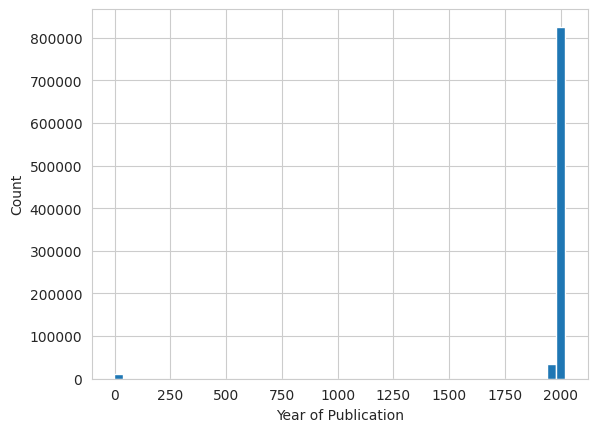

In [ ]:
import matplotlib.pyplot as plt

plt.hist(train['Year-Of-Publication'], bins=50)
plt.xlabel('Year of Publication')
plt.ylabel('Count')
plt.show()


출판년도에 -1값이 11515 개 있음

In [ ]:
train["Year-Of-Publication"].median()

1997.0

In [ ]:
year_error = -1
train[train["Year-Of-Publication"] == year_error]

,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
184,TRAIN_000184,USER_00049,BOOK_121460,0,37.0,"gaylord, michigan, usa",Bxc Blue Bay Mystery,Gertrude Cha Warner,-1.0,Scholastic Inc
186,TRAIN_000186,USER_00049,BOOK_175661,10,37.0,"gaylord, michigan, usa",Lighthouse Mystery,Gertrude C Warner,-1.0,Scholastic Inc
191,TRAIN_000191,USER_00049,BOOK_230275,0,37.0,"gaylord, michigan, usa",Mike's Mystery,Gertrude Cha Warner,-1.0,Scholastic Inc
231,TRAIN_000231,USER_00054,BOOK_122689,0,39.0,"spring, texas, usa",Charming Billy,Alice Mcdermott,-1.0,"Farrar, Straus Giroux"
290,TRAIN_000290,USER_00060,BOOK_165427,0,27.0,"los angeles, california, usa",Moon Palace,Paul Auster,-1.0,Faber Faber Inc
...,...,...,...,...,...,...,...,...,...,...
870700,TRAIN_870700,USER_92056,BOOK_093874,5,35.0,"leucadia, california, usa",High Ground,John Mcgahern,-1.0,Faber Faber Inc
870751,TRAIN_870751,USER_92058,BOOK_117063,0,24.0,"halifax, nova scotia, canada",Hotel Du Lac,Anita Brookner,-1.0,Penguin Putnam~trade
870776,TRAIN_870776,USER_92058,BOOK_181486,8,24.0,"halifax, nova scotia, canada",Laurels Kitchen a Handbook for Vegetarian Co,Laurel Robertson,-1.0,Bantam Doubleday Dell
870895,TRAIN_870895,USER_92080,BOOK_045027,10,35.0,"brookhaven, mississippi, usa",Best of Sisters In Crime,Marilyn Wallace,-1.0,Penguin Putnam~childrens Hc


In [ ]:
# train['Year-Of-Publication'] = np.where((train['Year-Of-Publication'] < 1950) | (train['Year-Of-Publication'] > 2010), np.nan, train['Year-Of-Publication'])

# 결측치를 평균값으로 대체하기
mean_Year = train['Year-Of-Publication'].mean()
train['Year-Of-Publication'] = train['Year-Of-Publication'].fillna(mean_Year)



# Year-Of-Publication 전처리논의 

* 의견1) -1값은 최빈값인 1997로 대체    
* 의견2)  이상치 확인, 1950년보다 작거나 2010년보다 큰 값을 가지는 셀에 대해, 해당 셀을 NaN으로 변환 후,해당 결측치를 평균값으로 대체  
* 의견3) 변동 없음  

# Book-Author

### 유저들이 가장 많이 찾은 상위 10위 작가

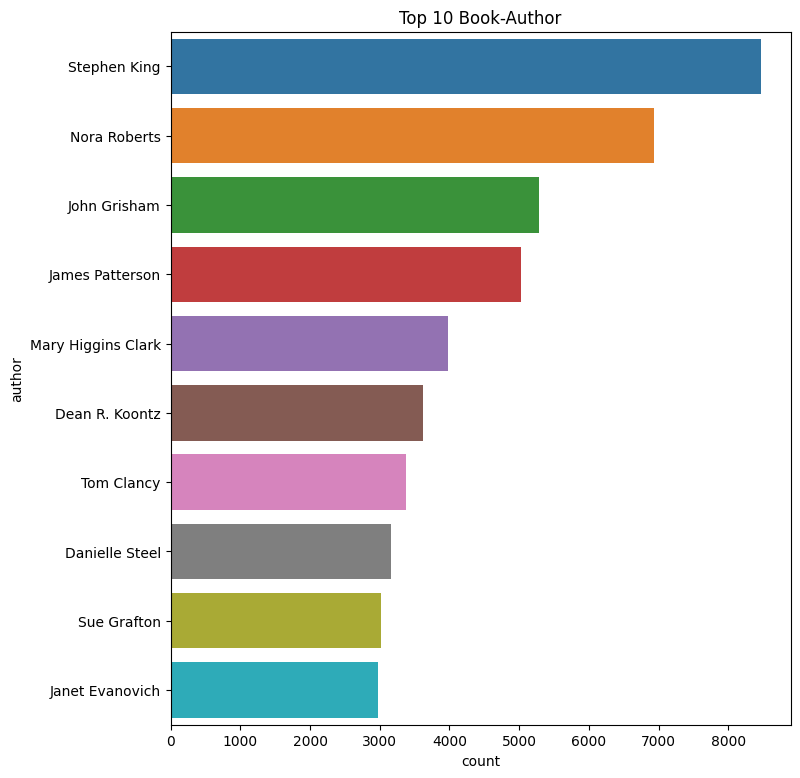

In [ ]:
ds = train['Book-Author'].value_counts().reset_index()
ds.columns = ['author', 'count']
ds = ds.sort_values('count', ascending=False).head(10)

plt.figure(figsize=(8, 9))
sns.barplot(x='count', y='author', data=ds, orient='h')
plt.title('Top 10 Book-Author')
plt.show()

In [ ]:
ds

,author,count
0,Stephen King,8467
1,Nora Roberts,6934
2,John Grisham,5283
3,James Patterson,5020
4,Mary Higgins Clark,3983
5,Dean R. Koontz,3615
6,Tom Clancy,3373
7,Danielle Steel,3165
8,Sue Grafton,3011
9,Janet Evanovich,2969


평균 평점이 좋은 상위10위 작가

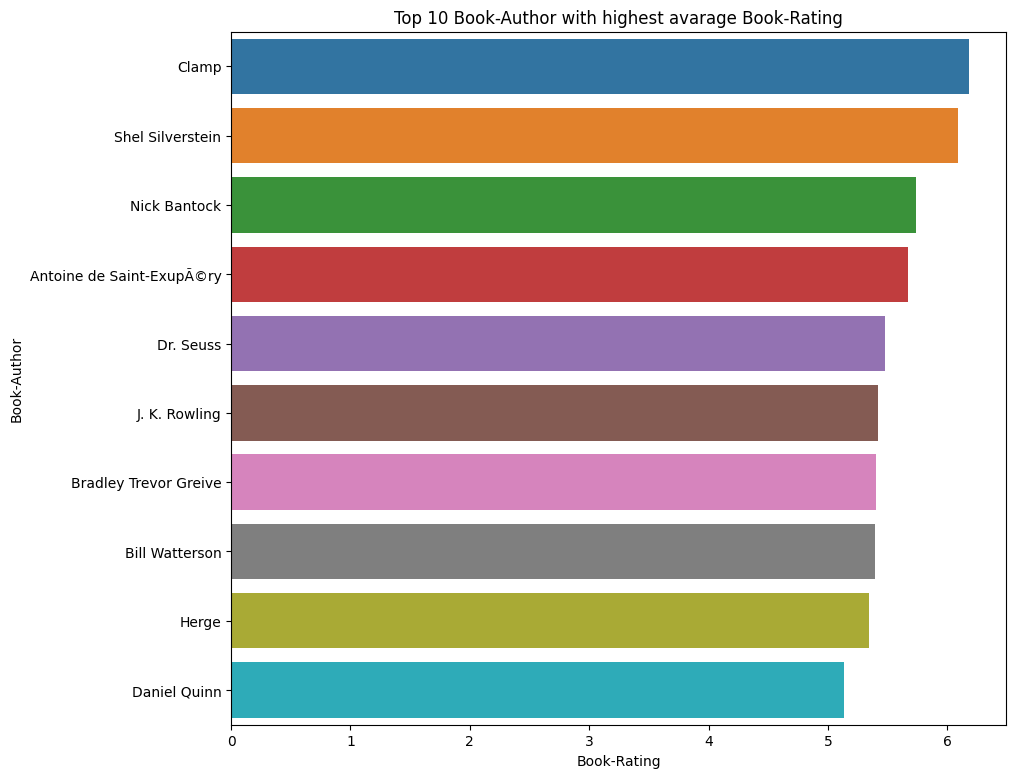

In [ ]:
author = train['Book-Author'].value_counts().reset_index()
author.columns = ['Book-Author', 'author_evaluation_count']
df = pd.merge(train, author)

mean_df = df[df['author_evaluation_count']>100]
mean_df = mean_df.groupby('Book-Author')['Book-Rating'].mean().reset_index().sort_values('Book-Rating', ascending=False)

top_50_mean_df = mean_df.head(10)

plt.figure(figsize=(10,9))
sns.barplot(x='Book-Rating', y='Book-Author', data=top_50_mean_df, orient='h')
plt.title('Top 10 Book-Author with highest avarage Book-Rating')
plt.show()

# Publisher

### 평균평점이 높은 도서의 상위10위 출판사

In [ ]:
books = train['Publisher'].value_counts().reset_index()
books.columns = ['Publisher', 'Publisher_evaluation_count']
df = pd.merge(train, books)
mean_df = df[df['Publisher_evaluation_count']>100]
mean_df = mean_df.groupby('Publisher')['Book-Rating'].mean().reset_index().sort_values('Book-Rating', ascending=False)

mean_df['Publisher'].nunique()

638

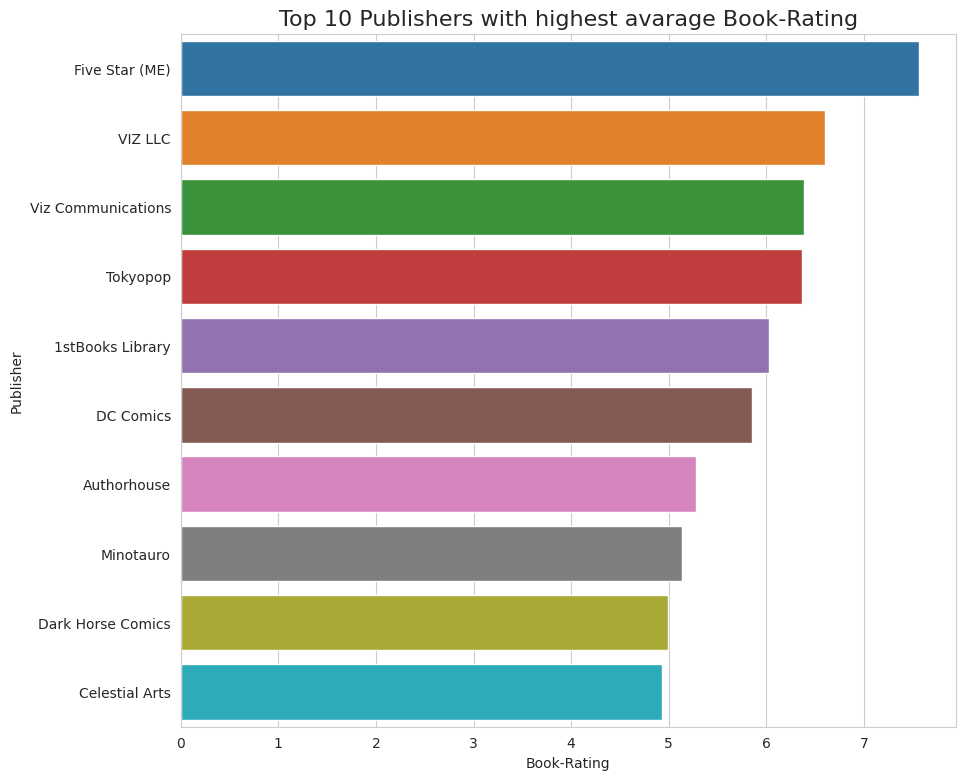

In [ ]:
publisher = train['Publisher'].value_counts().reset_index()
publisher.columns = ['Publisher', 'Publisher_evaluation_count']
df = pd.merge(train, publisher)
df['Publisher'] = df['Publisher'].replace('TokyoPop', 'Tokyopop')  # 'TokyoPop'을 'Tokyopop'으로 변경
mean_df = df[df['Publisher_evaluation_count'] > 100]
mean_df = mean_df.groupby('Publisher')['Book-Rating'].mean().reset_index().sort_values('Book-Rating', ascending=False)

sns.set_style("whitegrid")
plt.figure(figsize=(10, 9))
sns.barplot(x='Book-Rating', y='Publisher', data=mean_df.head(10), orient='h')
plt.title('Top 10 Publishers with highest avarage Book-Rating', fontsize=16)
plt.show()


# 유저별 도서이용 횟수 및 평균 평점

In [ ]:
# "Book-ID" string타입으로 변환
train['Book-ID'] = train['Book-ID'].astype(str)

# "Book-ID"에서 "BOOK_" 부분제거
train['Book-ID'] = train['Book-ID'].str.replace('BOOK_', '')

# "Book-ID" 정수로 변환 
train['Book-ID'] = train['Book-ID'].astype(int)

In [ ]:
train['Book-ID']

0          44368
1          81205
2          86781
3          98622
4         180810
           ...  
871388     81138
871389    258124
871390     71848
871391    252599
871392    130798
Name: Book-ID, Length: 871393, dtype: int64

In [ ]:
train['User-ID']

0         USER_00000
1         USER_00000
2         USER_00000
3         USER_00000
4         USER_00000
             ...    
871388    USER_92096
871389    USER_92097
871390    USER_92098
871391    USER_92099
871392    USER_92100
Name: User-ID, Length: 871393, dtype: object

In [ ]:
user_groupby = train.groupby("User-ID")
book_groupby = train.groupby("Book-ID")
average_user_rating = user_groupby["Book-Rating"].mean() # 각 유저가 매기는 책 평점의 평균
number_of_rating_by_user = user_groupby["Book-Rating"].count() #각 유저별 책 평점 매긴 횟수 
average_book_rating = book_groupby["Book-Rating"].mean() # 책 별 평균 평점
number_of_book_ratings = book_groupby["Book-Rating"].count() # 각 책 별 평균 평점의 개수 

In [ ]:
number_of_book_ratings

Book-ID
1          1
2          1
3          1
4         30
5          3
          ..
270051     1
270052    15
270053     3
270054     1
270055     5
Name: Book-Rating, Length: 243441, dtype: int64

In [ ]:
average_user_rating.name = "avg_rating"
number_of_rating_by_user.name = "N_ratings"
average_book_rating.name = "avg_rating"
number_of_book_ratings.name = "N_ratings"

In [ ]:
users = train[["User-ID"]].drop_duplicates().merge(number_of_rating_by_user, on="User-ID")
users = users.join(average_user_rating, on="User-ID")
users

,User-ID,N_ratings,avg_rating
0,USER_00000,8,4.750000
1,USER_00001,3,4.000000
2,USER_00002,1,0.000000
3,USER_00003,22,5.954545
4,USER_00004,8,6.500000
...,...,...,...
83251,USER_92096,1,0.000000
83252,USER_92097,1,0.000000
83253,USER_92098,1,0.000000
83254,USER_92099,1,8.000000


* 예를들어 User-ID가 USER_00000인 사람의 도서이용횟수는 8회이며 평균적으로 4.75 평점을 남김 
* 가장 많은 도서기록 횟수는 1145회이다. 

In [ ]:
users['N_ratings'].max()

11143

# 도서별 이용 횟수와 평균 평점  

도서의 정보 및 이용 횟수와 평균 평점 추가한 데이터셋 생성

In [ ]:
books =  train[["Book-ID","Book-Title", "Book-Author", "Year-Of-Publication"]].drop_duplicates().merge(number_of_book_ratings, on="Book-ID")
books = books.join(average_book_rating, on="Book-ID")
books

,Book-ID,Book-Title,Book-Author,Year-Of-Publication,N_ratings,avg_rating
0,44368,Road Taken,Rona Jaffe,2001.0,14,2.428571
1,81205,Macbeth (New Penguin Shakespeare),William Shakespeare,1981.0,6,4.000000
2,86781,Waverley (Penguin English Library),Walter Scott,1981.0,2,0.000000
3,98622,Mother Earth Father Sky,Sue Harrison,1991.0,23,3.086957
4,180810,She Who Remembers,Linda Lay Shuler,1989.0,53,1.698113
...,...,...,...,...,...,...
243436,264287,Prodigals and Those Who Love Them: Study Guide,Stephen Griffith,1991.0,1,0.000000
243437,264484,A Transatlantic Love Affair: Letters to Nelson...,Simone De Beauvoir,1999.0,1,0.000000
243438,265220,He's My Brother: Former Racial Foes Offer Stra...,John Perkins,1994.0,1,0.000000
243439,266941,Creme De Colorado Cookbook (Celebrating Twenty...,Junior League of Denver,1987.0,1,10.000000


In [ ]:
books['N_ratings'].mean()

3.5794833245016244

In [ ]:
popbooks = books.sort_values(by="N_ratings", ascending=False).nlargest(10, 'N_ratings')
popbooks

,Book-ID,Book-Title,Book-Author,Year-Of-Publication,N_ratings,avg_rating
85,97861,Wild Animus,Rich Shapero,2004.0,2502,1.019584
640,50555,The Da Vinci Code,Dan Brown,2003.0,883,4.652322
226,114855,The Lovely Bones: A Novel,Alice Sebold,2002.0,768,4.378906
3579,206174,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997.0,732,3.448087
366,84346,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,723,4.334716
610,176344,A Painted House,John Grisham,2001.0,647,3.187017
1095,163526,The Secret Life of Bees,Sue Monk Kidd,2003.0,615,4.219512
856,77238,Angels &amp; Demons,Dan Brown,2001.0,586,3.718430
258,261787,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998.0,585,4.105983
1515,152477,House of Sand and Fog,Andre Dubus III,2000.0,552,3.039855


가장 많이 이용한 상위 10개 도서

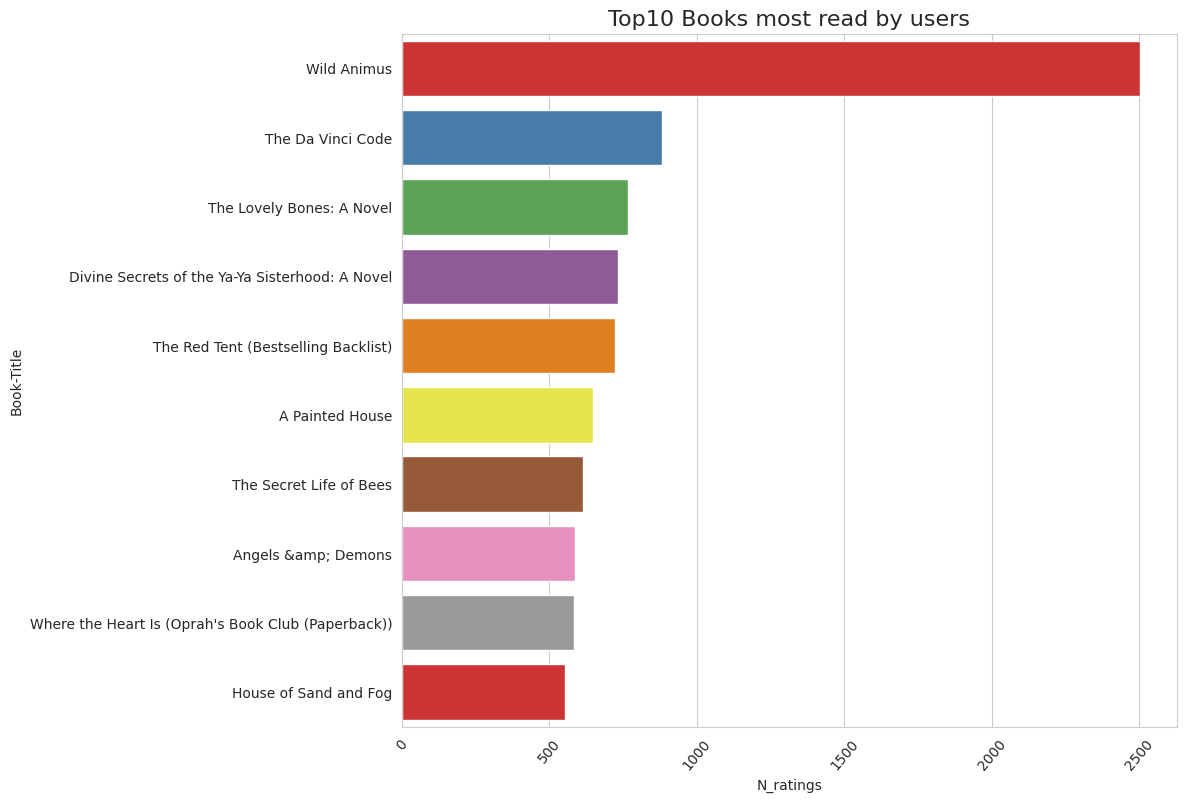

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = 10, 9

# seaborn 패키지로 barplot 그리기
sns.barplot(x='N_ratings', y='Book-Title', data=popbooks,palette='Set1')

# x축 레이블 90도 회전
plt.xticks(rotation=50)

# 그래프 제목 추가
plt.title('Top10 Books most read by users', fontsize=16)

# 그래프 출력
plt.show()


도서당 평점의 갯수의 평균이 3.57이므로 N_ratings가 4 이상인 평점좋은 도서는 다음과 같다 

In [ ]:
goodratingbooks = books[(books['N_ratings'] >= 4)].sort_values(by="avg_rating", ascending=False).nlargest(10, 'avg_rating')
goodratingbooks

,Book-ID,Book-Title,Book-Author,Year-Of-Publication,N_ratings,avg_rating
141922,90187,Betsy and Joe (Betsy &amp; Tacy),Maud Hart Lovelace,1995.0,4,10.00
99690,75152,The Lord of the Rings (Leatherette Collector's...,J. R. R. Tolkien,1974.0,6,10.00
184969,11976,Cinder Edna,Ellen Jackson,1994.0,4,10.00
82883,124743,Charlottes Web Special Read Along Edition,E B White,1997.0,4,10.00
80194,215100,Dinotopia: A Land Apart from Time (Dinotopia),James Gurney,1998.0,4,10.00
49550,143000,Ain't Nobody's Business If You Do : The Absurd...,Peter McWilliams,1996.0,5,9.80
77463,14110,Encounters with the Archdruid,John McPhee,1977.0,4,9.75
116320,191739,Interpreter of Maladies,Jhumpa Lahiri,1999.0,4,9.75
108798,245282,The Diaries of Adam and Eve,Mark Twain,1998.0,4,9.75
2124,246686,We Are Experiencing Parental Difficulties...Pl...,Rick Kirkman,1995.0,4,9.75


* 예를들어 Harry Potter 단어가 포함된 단어를 찾으면 해당 정보를 아래와 같이 찾을 수 있음
* 같은 책이라도 에디션에 따라 나뉘는 종류가 다르게 경우가 있다
* 같은 저자라도 J.K Rowling, Joanne K,Rowling, Joanne K.Rowling과 같이 다른 방식으로 표기가 되어있는 경우가 있다 

In [ ]:
books[books["Book-Title"].str.contains("Harry Potter") & books["Book-Author"].str.contains("Rowling")]

,Book-ID,Book-Title,Book-Author,Year-Of-Publication,N_ratings,avg_rating
753,172130,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,1998.0,97,6.917526
763,183360,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,1999.0,103,6.485437
1206,116632,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,2001.0,226,5.345133
1345,232482,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,2000.0,351,4.729345
1702,70570,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2002.0,120,5.041667
...,...,...,...,...,...,...
203352,38852,Harry Potter and the Chamber of Secrets (Book ...,J. K. Rowling,1999.0,1,8.000000
207933,261432,Harry Potter. Magisches Tagebuch. Ausgabe grÃ?...,Joanne K. Rowling,2001.0,1,0.000000
228034,156747,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,2001.0,2,5.000000
231928,92164,"Harry Potter, tome 2 : Harry Potter et la Cham...",Joanne K. Rowling,1999.0,1,6.000000


# Location

- city, state, country 로 구성.

국가 정보만 있는 새로운 열 생성

In [ ]:
# Location 변수에서 "vermilion", "ohio", "usa" 추출하여 새로운 변수 생성
new_train = train.copy()
# new_trains = count_null_values(new_train, "")
# new_train['City'] = train['Location'].str.split(', ').str[0]
# new_train['State'] = train['Location'].str.split(', ').str[1]
# new_train['Country'] = train['Location'].str.split(', ').str[-1]
countries = []
cond = new_train['Location'].str.split(',')

for cont in cond:
    
    countries.append(cont[-1].strip().title())

In [ ]:
countries = []
cond = new_train['Location'].str.split(',')

for cont in cond:
    
    countries.append(cont[-1].strip().title())

In [ ]:
new_train["Country"] = countries
new_train.head()

,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher,Country
0,TRAIN_000000,USER_00000,44368,8,23.0,"sackville, new brunswick, canada",Road Taken,Rona Jaffe,2001.0,Mira,Canada
1,TRAIN_000001,USER_00000,81205,8,23.0,"sackville, new brunswick, canada",Macbeth (New Penguin Shakespeare),William Shakespeare,1981.0,Penguin Books,Canada
2,TRAIN_000002,USER_00000,86781,0,23.0,"sackville, new brunswick, canada",Waverley (Penguin English Library),Walter Scott,1981.0,Penguin Books,Canada
3,TRAIN_000003,USER_00000,98622,0,23.0,"sackville, new brunswick, canada",Mother Earth Father Sky,Sue Harrison,1991.0,Avon,Canada
4,TRAIN_000004,USER_00000,180810,8,23.0,"sackville, new brunswick, canada",She Who Remembers,Linda Lay Shuler,1989.0,Signet Book,Canada


"Usa", "United Sates"와 같이 동일 국가여도 다르게 표기된 데이터들이 있어 해당 정보 통일해주는 전처리 진행

In [ ]:
new_train.loc[new_train["Country"] == "Usa", "Country"] = "United States"
new_train.loc[new_train["Country"] == "España", "Country"] = "Spain"
new_train.loc[new_train["Country"] == "England", "Country"] = "United Kingdom"
new_train.loc[new_train["Country"] == "Trinidad And Tobago", "Country"] = "Trinidad and Tobago"
new_train.loc[new_train["Country"] == "Deutschland", "Country"] = "Germany"
new_train.loc[new_train["Country"] == "Tanzania", "Country"] = "Tanzania, United Republic of"
new_train.loc[new_train["Country"] == "Moldova", "Country"] = "Moldova, Republic of"
new_train.loc[new_train["Country"] == "Czech Republic", "Country"] = "Czechia"
new_train.loc[new_train["Country"] == "South Korea", "Country"] = "Korea, Republic of"
new_train.loc[new_train["Country"] == "Venezuela", "Country"] = "Venezuela, Bolivarian Republic of"
new_train.loc[new_train["Country"] == "Galiza", "Country"] = "Spain"
new_train.loc[new_train["Country"] == "Taiwan", "Country"] = "Taiwan, Province of China"
new_train.loc[new_train["Country"] == "Scotland", "Country"] = "United Kingdom"
new_train.loc[new_train["Country"] == "Bolivia", "Country"] = "Bolivia, Plurinational State of"
new_train.loc[new_train["Country"] == "Iran", "Country"] = "Iran, Islamic Republic of"
new_train.loc[new_train["Country"] == "United Sates", "Country"] = "United States"
new_train.loc[new_train["Country"] == "Maricopa", "Country"] = "United States"
new_train.loc[new_train["Country"] == "Galiza Neghra", "Country"] = "Spain"
new_train.loc[new_train["Country"] == "Richmond Country", "Country"] = "United States"
new_train.loc[new_train["Country"] == "Catalunya", "Country"] = "Spain"
new_train.loc[new_train["Country"] == "Vietnam", "Country"] = "Viet Nam"
new_train.loc[new_train["Country"] == "La Chine Éternelle", "Country"] = "China"
new_train.loc[new_train["Country"] == "Lleida", "Country"] = "Spain"
new_train.loc[new_train["Country"] == "La Chine Éternelle !", "Country"] = "China"
new_train.loc[new_train["Country"] == "La Chine Éternelle!", "Country"] = "China"
new_train.loc[new_train["Country"] == "Framingham", "Country"] = "United States"
new_train.loc[new_train["Country"] == "Usa (Currently Living In England)", "Country"] = "United Kingdom"
new_train.loc[new_train["Country"] == "Alderney", "Country"] = "United Kingdom"
new_train.loc[new_train["Country"] == "Saint Loius", "Country"] = "United States"
new_train.loc[new_train["Country"] == "Laos", "Country"] = "LA"
new_train.loc[new_train["Country"] == "Collin", "Country"] = "United States"
new_train.loc[new_train["Country"] == "Burma", "Country"] = "Myanmar"
new_train.loc[new_train["Country"] == "Shelby", "Country"] = "United States"
new_train.loc[new_train["Country"] == "Worcester", "Country"] = "United States"
new_train.loc[new_train["Country"] == "Los Estados Unidos De Norte America", "Country"] = "United States"
new_train.loc[new_train["Country"] == "Russia", "Country"] = "Russian Federation"
new_train.loc[new_train["Country"] == "Polk", "Country"] = "United States"
new_train.loc[new_train["Country"] == "U.A.E", "Country"] = "United Arab Emirates"
new_train.loc[new_train["Country"] == "U.S.A.", "Country"] = "United States"
new_train.loc[new_train["Country"] == "Cherokee", "Country"] = "United States"
new_train.loc[new_train["Country"] == "Cananda", "Country"] = "Canada"
new_train.loc[new_train["Country"] == "Morgan", "Country"] = "France"
new_train.loc[new_train["Country"] == "Cape Verde", "Country"] = "Cabo Verde"
new_train.loc[new_train["Country"] == "Antigua And Barbuda", "Country"] = "Antigua and Barbuda"
new_train.loc[new_train["Country"] == "Us", "Country"] = "United States"
new_train.loc[new_train["Country"] == "Euskal Herria", "Country"] = "Spain"
new_train.loc[new_train["Country"] == "Bosnia And Herzegovina", "Country"] = "Bosnia and Herzegovina"
new_train.loc[new_train["Country"] == "Ventura County", "Country"] = "United States"
new_train.loc[new_train["Country"] == "Csa", "Country"] = "Canada"
new_train.loc[new_train["Country"] == "Hernando", "Country"] = "United States"
new_train.loc[new_train["Country"] == "Prince William", "Country"] = "United Kingdom"
new_train.loc[new_train["Country"] == "Onondaga Nation", "Country"] = "United States"
new_train.loc[new_train["Country"] == "Tobago", "Country"] = "Trinidad and Tobago"
new_train.loc[new_train["Country"] == "Catalonia", "Country"] = "Spain"
new_train.loc[new_train["Country"] == "Urugua", "Country"] = "Uruguay"
new_train.loc[new_train["Country"] == "Phillipines", "Country"] = "Philippines"
new_train.loc[new_train["Country"] == "San Mateo", "Country"] = "United States"
new_train.loc[new_train["Country"] == "Nz", "Country"] = "New Zealand"
new_train.loc[new_train["Country"] == "Italia", "Country"] = "Italy"
new_train.loc[new_train["Country"] == "Berguedà", "Country"] = "Spain"
new_train.loc[new_train["Country"] == "Ferrara", "Country"] = "Italy"
new_train.loc[new_train["Country"] == "L`Italia", "Country"] = "Italy"
new_train.loc[new_train["Country"] == "Wales", "Country"] = "United Kingdom"
new_train.loc[new_train["Country"] == "Macau", "Country"] = "China"
new_train.loc[new_train["Country"] == "Macedonia", "Country"] = "North Macedonia"
new_train.loc[new_train["Country"] == "Channel Islands", "Country"] = "United Kingdom"
new_train.loc[new_train["Country"] == "United Kindgonm", "Country"] = "United Kingdom"
new_train.loc[new_train["Country"] == "Brunei", "Country"] = "Brunei Darussalam"
new_train.loc[new_train["Country"] == "K1C7B1", "Country"] = "Canada"
new_train.loc[new_train["Country"] == "St.Thomasi", "Country"] = "Canada"
new_train.loc[new_train["Country"] == "Catalunya Spain", "Country"] = "Spain"
new_train.loc[new_train["Country"] == "La Belgique", "Country"] = "Belgium"
new_train.loc[new_train["Country"] == "Aroostook", "Country"] = "United States"
new_train.loc[new_train["Country"] == "Rutherford", "Country"] = "United States"
new_train.loc[new_train["Country"] == "Fort Bend", "Country"] = "United States"
new_train.loc[new_train["Country"] == "Syria", "Country"] = "Syrian Arab Republic"
new_train.loc[new_train["Country"] == "U.K.", "Country"] = "United Kingdom"
new_train.loc[new_train["Country"] == "Madrid", "Country"] = "Spain"
new_train.loc[new_train["Country"] == "Orense", "Country"] = "Spain"
new_train.loc[new_train["Country"] == "St. Helena", "Country"] = "United Kingdom"
new_train.loc[new_train["Country"] == "La France", "Country"] = "France"
new_train.loc[new_train["Country"] == "U.S. Of A.", "Country"] = "United States"
new_train.loc[new_train["Country"] == "United Staes", "Country"] = "United States"
new_train.loc[new_train["Country"] == "Ee.Uu", "Country"] = "United States"
new_train.loc[new_train["Country"] == "Alachua", "Country"] = "United States"
new_train.loc[new_train["Country"] == "Burlington", "Country"] = "United States"
new_train.loc[new_train["Country"] == "Van Wert", "Country"] = "United States"
new_train.loc[new_train["Country"] == "Camden", "Country"] = "United Kingdom"
new_train.loc[new_train["Country"] == "U.S>", "Country"] = "United States"
new_train.loc[new_train["Country"] == "America", "Country"] = "United States"
new_train.loc[new_train["Country"] == "United State", "Country"] = "United States"

In [ ]:
new_train

,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher,Country
0,TRAIN_000000,USER_00000,44368,8,23.0,"sackville, new brunswick, canada",Road Taken,Rona Jaffe,2001.0,Mira,Canada
1,TRAIN_000001,USER_00000,81205,8,23.0,"sackville, new brunswick, canada",Macbeth (New Penguin Shakespeare),William Shakespeare,1981.0,Penguin Books,Canada
2,TRAIN_000002,USER_00000,86781,0,23.0,"sackville, new brunswick, canada",Waverley (Penguin English Library),Walter Scott,1981.0,Penguin Books,Canada
3,TRAIN_000003,USER_00000,98622,0,23.0,"sackville, new brunswick, canada",Mother Earth Father Sky,Sue Harrison,1991.0,Avon,Canada
4,TRAIN_000004,USER_00000,180810,8,23.0,"sackville, new brunswick, canada",She Who Remembers,Linda Lay Shuler,1989.0,Signet Book,Canada
...,...,...,...,...,...,...,...,...,...,...,...
871388,TRAIN_871388,USER_92096,81138,0,34.0,"minneapolis, minnesota, usa",Healing Words: The Power of Prayer and the Pra...,Larry Dossey,1993.0,Harpercollins,United States
871389,TRAIN_871389,USER_92097,258124,0,35.0,"temple, texas, usa",The Salmon of Doubt: Hitchhiking the Galaxy On...,DOUGLAS ADAMS,2002.0,Harmony,United States
871390,TRAIN_871390,USER_92098,71848,0,45.0,"ottawa, ontario, canada",Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,2000.0,Thorndike Press,Canada
871391,TRAIN_871391,USER_92099,252599,8,43.0,"maple grove, minnesota, usa",Heartbreak Hill: Anatomy of a Ryder Cup,Tim Rosaforte,1996.0,St Martins Pr,United States


올바르지 않은 명칭으로 표기된 국가정보를 찾기 위해 pycountry 라이브러리 사용

In [ ]:
#!pip install pycountry

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 10.1 MB 21.0 MB/s            
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=139c8830d22d73a3180b06bd7589645277e5157a6a187463b4c155dce7adb2c7
  Stored in directory: /home/work/.cache/pip/wheels/e2/aa/0f/c224e473b464387170b83ca7c66947b4a7e33e8d903a679748
Successfully built pycountry


In [ ]:
import pycountry

countries = [country.name for country in pycountry.countries]

In [ ]:
country_values = new_train["Country"].unique()

In [ ]:
import pycountry

country = pycountry.countries.lookup('BE')
print(country.name)

Belgium


해당 데이터는 사용자가 자유롭게 지역을 기입하는 방식으로 구성되어 있어 아래와 같이 국가정보 파악이 힘든 데이터가 있음을 발견 

In [ ]:
invalid_countries = []

for country in country_values:
    if country not in countries:
        print(f"Invalid country name: {country}")
        invalid_countries.append(country)


Invalid country name: 
Invalid country name: Petrolwar Nation
Invalid country name: The World Tomorrow
Invalid country name: Universe
Invalid country name: LA
Invalid country name: N/A
Invalid country name: Tdzimi
Invalid country name: Space
Invalid country name: Here And There
Invalid country name: Pender
Invalid country name: Yugoslavia
Invalid country name: X
Invalid country name: Kern
Invalid country name: We`Re Global!
Invalid country name: Disgruntled States Of America
Invalid country name: Unknown
Invalid country name: Ysa
Invalid country name: N/A - On The Road
Invalid country name: The Great White North
Invalid country name: Caribbean Sea
Invalid country name: "N/A"
Invalid country name: The
Invalid country name: Far Away...
Invalid country name: Quit
Invalid country name: Hungary And Usa
Invalid country name: C
Invalid country name: Everywhere And Anywhere


위 국가 정보 삭제 

In [ ]:
for country in invalid_countries:
    new_train = new_train[new_train['Country'] != country]

국가명(Country)을 ISO-3166-1 alpha-3 국가 코드로 변환

In [ ]:
#!pip install country_converter


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 44 kB 6.2 MB/s             
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  NOTE: The current PATH contains path(s) starting with `~`, which may not be expanded by all applications.


In [ ]:
import country_converter as coco

In [ ]:
converted_country=coco.convert(names=new_train["Country"], to="ISO3")
new_train["Country"]=converted_country

In [ ]:
countriestop10=new_train['Country'].value_counts().reset_index().head(10)
countriestop10.set_index('index')

,index,Country
0,USA,630647
1,CAN,78576
2,GBR,27202
3,DEU,23481
4,AUS,15270
5,ESP,12638
6,FRA,8969
7,PRT,5974
8,NZL,4691
9,MYS,4551


In [ ]:
countriestop10pct=new_train['Country'].value_counts(1).reset_index().head(10)
countriestop10pct.set_index('index')

,Country
index,
USA,0.751758
CAN,0.093666
GBR,0.032426
DEU,0.027990
AUS,0.018202
ESP,0.015065
FRA,0.010691
PRT,0.007121
NZL,0.005592


<AxesSubplot:xlabel='index', ylabel='Country'>

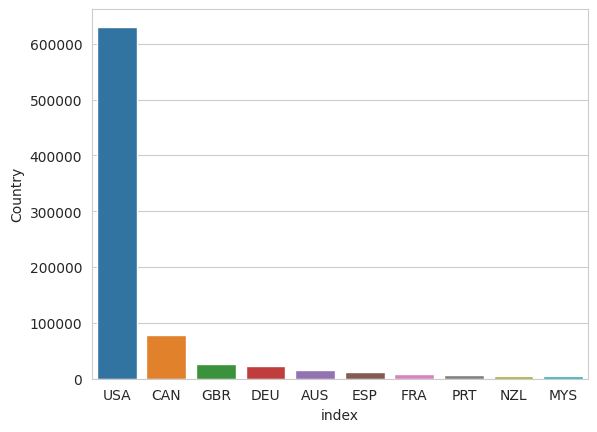

In [ ]:
sns.barplot(x=countriestop10.index, y=countriestop10.Country)

* USA =  미국
* CAN =  캐나다
* GBR =  영국 
* DEU =  독일
* AUS =  호주
* ESP = 스페인
* FRA = 프랑스
* PRT = 포르투갈
* NZL = 뉴질랜드
* MYS =  말레이시아 

도서이용량이 많은 나라는 미국이 압도적으로 가장 많으며 캐나다, 영국, 독일, 호주 등으로 분포되어있다

In [ ]:
#!pip install plotly-express
import plotly.express as px

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)


country=new_train["Country"].value_counts()
fig=px.choropleth(locations=country.index,
                  color=country.values,
                  color_continuous_scale=px.colors.sequential.dense,
                  template='plotly_dark',
                  title='Distribution of users by countries')

fig.update_layout(font=dict(size=17, family="Franklin Gothic"))
fig.show()

# 나라별 도서 평균 평점 

In [ ]:
book_count = new_train.groupby('Book-ID')['Book-Rating'].count().reset_index(name='Count')
book_rating = new_train.groupby('Book-ID')['Book-Rating'].mean().reset_index(name='Avg-Rating')
book = pd.merge(book_count, book_rating, on='Book-ID')
book['Rating-Per-Count'] = book['Avg-Rating'] / book['Count']
country_rating = new_train.merge(book, on='Book-ID').groupby('Country')['Rating-Per-Count'].mean()
country_rating = country_rating.sort_values(ascending=False).head(10)

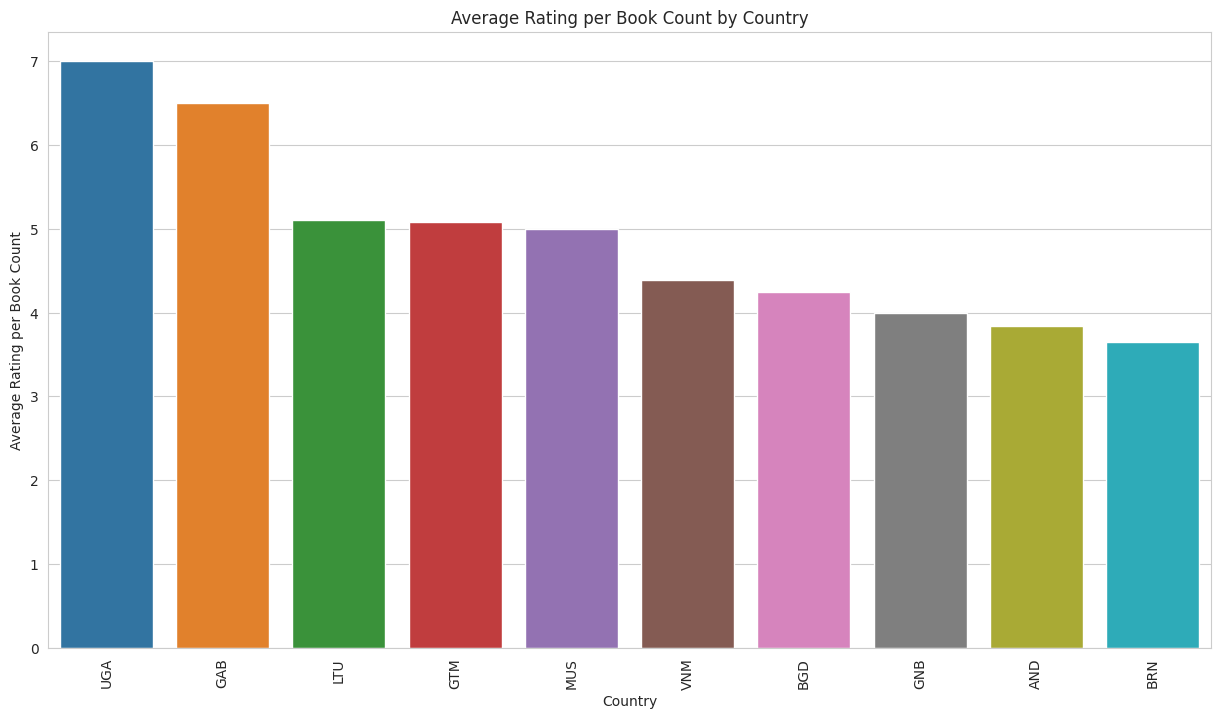

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(x=country_rating.index, y=country_rating.values)
plt.xticks(rotation=90)
plt.title('Average Rating per Book Count by Country')
plt.xlabel('Country')
plt.ylabel('Average Rating per Book Count')
plt.show()


- UGA = 우간다
- GAB = 가봉
- LTU = 리투아니아
- GTM = 과테말라
- MUS = 모리셔스공화국
- VNM = 베트남
- BGD = 방글라데스
- GNB = 기니비사우
- AND = 안다우스
- BRN = 브루나이

나라별 도서평균평점을 가장 높게 준 나라는 순서대로 우간다이며 가봉 리투아니아 과테말라가 뒤를 잇는다.